In [1]:
from tkinter import *
from tkinter.ttk import Combobox
import tkinter.messagebox as m
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
class PageDesign :
    
    def interface (self):
        self.screen = Tk()
        self.screen.geometry('550x700')
        self.screen.title('Stock Predictor')
        stock_label = Label(self.screen, text= 'Stock  Name' , font = ('times',16)).grid(row=0, column=0, padx=30, pady=15, ipadx=5, ipady=5, sticky=E)
        self.stock_option = Combobox(self.screen, values=('googl', 'msft', 'aapl', ' Select  Stock '),font = ('times',12))
        self.stock_option.current(3)
        self.stock_option.grid(row=0, column=1, padx=30 ,ipadx=5, ipady=5)
        test_label = Label(self.screen, text= 'Test  Size' , font = ('times',16)).grid(row=1, column=0, padx=30, ipadx=5, ipady=5, sticky=E)
        self.test_option = Combobox(self.screen, values=('0.1', '0.2', '0.3', ' Select  Test  Size '),font = ('times',12))
        self.test_option.current(3)
        self.test_option.grid(row=1, column=1, padx=30, ipadx=5, ipady=5)
        nod_label = Label(self.screen, text= 'No. of  Days' , font = ('times',16)).grid(row=2, column=0, padx=30,pady=10, ipadx=5, ipady=5, sticky=E) 
        x=list(range(1,21))
        x.append(' Choose  no. of  days ')
        self.nod_option = Combobox(self.screen,values= tuple(x),font = ('times',12))
        self.nod_option.current(20)
        self.nod_option.grid(row=2, column=1, padx=30,pady=15, ipadx=5, ipady=5) 
        evaluate_label = Button(self.screen, text= 'Evaluate' , font = ('times',16), border =3,relief =GROOVE, command=check.evaluate ).grid(row=3, column=0, padx=30,pady=30, ipadx=5,  sticky=E)
        visualise_label = Button(self.screen, text= 'Visualise' , font = ('times',16), border =3,relief = GROOVE,command = check.visualise).grid(row=3, column=1, padx=30,pady=10, ipadx=5)
        accuracy_label = Label(self.screen, text=' Accuracy :' ,font = ('times',16)).grid(row=4, column=0, padx=30, ipadx=5, sticky=E)
        self.show_accuracy_label = Label(self.screen ,text='Accuracy', font = ('times',16), bg='gainsboro')
        self.show_accuracy_label.grid(row=4, column=1, padx=30,pady=10, ipadx=5, ipady=5, sticky=W)
        self.show_prediction = Message(self.screen, text='Prediction happen here', width= 420, bg='snow3' , font = ('times',14))
        self.show_prediction.grid(row = 5,columnspan=3,rowspan=3, padx= 5,pady=30,ipadx=5,ipady=5)
        self.screen.mainloop()


In [3]:
class CheckErrors:
    
    def check_error (self):
        self.flag=0
        if (project.stock_option.get()!='googl' and project.stock_option.get()!='msft' and project.stock_option.get()!='aapl'):
            m.showerror('Invalid Stock name', 'Please choose Valid Stock name')
            self.flag+=1
        if (project.test_option.get() != '0.1' and project.test_option.get() != '0.2' and project.test_option.get() != '0.3'):
            m.showerror('Invalid Test Size ', 'Please choose Valid Test Size')
            self.flag+=1
        try:
            l=[i for i in range(21)]
            if int(project.nod_option.get()) not in l :
                m.showerror('Invalid Choice', 'Please choose No. of Days from given Options ')
                self.flag+=1
            del l
        except:
            m.showerror('Invalid Choice', 'Please choose No. of Days')
            self.flag+=1
            del l
           
        
    def evaluate (self): 
        self.check_error()
        if self.flag == 0:
            back_end.get_data()
            back_end.evaluate()
        
        
    def visualise (self):
        self.check_error()
        if self.flag == 0:
            back_end.get_data()
            back_end.visualise()

In [4]:
class BackEnd:
    
    def get_data (self):
        start = dt.datetime(2012,1,1)
        stop = dt.datetime.now()
        data = DataReader(project.stock_option.get(),'tiingo',start,stop,access_key='4cff43c02ddbbab40bb756a93d3998bc082c7637')
        data.reset_index(inplace=True)
        data.set_index('date',inplace=True)
        data = data[['adjClose', 'adjHigh', 'adjLow', 'adjOpen','adjVolume']]
        self.data1=data
        no_days=int(project.nod_option.get())
        x=data.drop('adjClose',axis=1)
        y=data['adjClose'][no_days:]
        x1=x[:-no_days]
        self.x2=x[-no_days:]
        x_tr, self.x_ts, y_tr, self.y_ts = train_test_split(x1,y,test_size=float(project.test_option.get()))
        self.algo = LinearRegression()
        self.algo.fit(x_tr,y_tr)
        
        
    def evaluate (self):
        project.show_accuracy_label['text'] = self.algo.score(self.x_ts, self.y_ts)
        project.show_prediction.config(text= self.algo.predict(self.x2))
        
    def visualise(self):
        prd = self.algo.predict(self.x2)
        self.data1['forecast']= np.nan
        lastday = self.data1.iloc[-1].name
        for i in prd:
            lastday = lastday + dt.timedelta(1)
            self.data1.loc[lastday]= [np.nan for _ in range(5)] +[i]
        
        project.screen.destroy()

        %matplotlib notebook
        self.data1['adjClose'].plot()
        self.data1['forecast'].plot()
        plt.show()
        
        
        
        
        

<IPython.core.display.Javascript object>


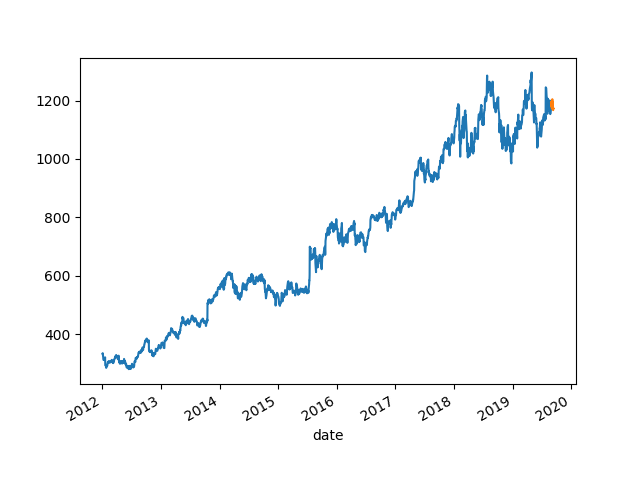

In [5]:
global project, back_end
check = CheckErrors()
back_end = BackEnd()
project = PageDesign()

project.interface()
